In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

(1200, 1920, 3)
160
(100, 160, 3)


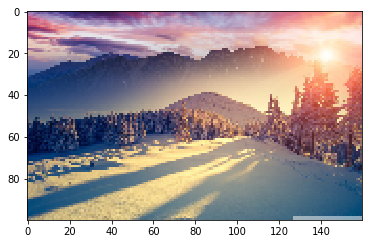

In [7]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print im.shape
new_r = 100
new_c = int((float(im.shape[1])/im.shape[0])*new_r)
print new_c

img = cv2.resize(im, (new_c, new_r))
print img.shape
plt.imshow(img)
plt.show()

In [10]:
data = np.reshape(img, (-1, 3))
print data.shape

(16000, 3)


In [11]:
print data.dtype

uint8


In [12]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=8)

In [17]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
centroids = np.array(km.cluster_centers_, dtype=np.uint8)
print centroids.shape
print centroids

(8, 3)
[[ 72  91 122]
 [238 199 149]
 [190 147 128]
 [ 30  49  92]
 [128 124 135]
 [244 221 197]
 [194 164 180]
 [138  85  91]]


In [25]:
print km.labels_.shape
print km.labels_.dtype
freq = np.unique(km.labels_, return_counts=True)
print freq

(16000,)
int32
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([2515, 2298, 2419, 2129, 2526, 1426, 1339, 1348]))


In [30]:
label_id = freq[0][freq[1].argmax()]
print label_id
most_dom_color = centroids[label_id]
print most_dom_color

display_stamp = np.zeros((20,20,3), dtype=np.uint8)
display_stamp[:, :, :] = most_dom_color

4
[128 124 135]


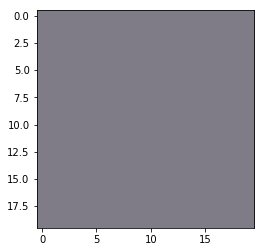

In [32]:
plt.imshow(display_stamp)
plt.show()